In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import string
#import scipy

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"

border_width = 0.5
linewidth = 6.202
grey = "#BDBDBD"

sns.set_context("paper", rc={"font.size": 8,
                             "axes.labelsize": 8,
                             "xtick.labelsize": 7,
                             "ytick.labelsize": 8,
                             "legend.fontsize": 8,
                             "legend.title_fontsize": 8,
                             "axes.linewidth": border_width})

ts_green = "#3D8F24"
ts_purple = "#6E38CC"

In [83]:
cluster_contexts = pd.read_csv("MNV_cluster_context_tallied.tsv",
                               delimiter=" ",
                               header=None,
                               names=["Count", "Mutation cluster\nsequence context"])

dinucleotides = pd.read_csv("MNV_dinucleotide_context_tallied_trunc.tsv",
                            delimiter=" ",
                            header=None,
                            names=["Count", "Dinucleotide mutation (REF→ALT)"])

In [10]:
cluster_contexts = pd.read_csv("SNVs_with_upstream_context.tsv",
                               delimiter=" ",
                               header=None,
                               names=["Count", "Clustered SNVs and\nsequence context"])

dinucleotides = pd.read_csv("MNV_dinucleotide_context_tallied_trunc2.tsv",
                            delimiter=" ",
                            header=None,
                            names=["Count", "Dinucleotide mutation (REF→ALT)"])

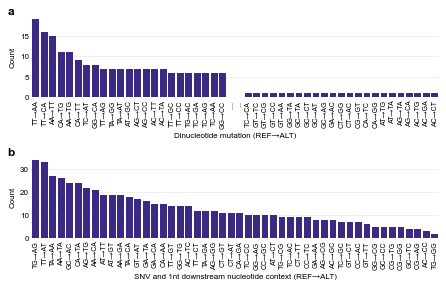

In [20]:
fig, ax = plt.subplots(2,1,figsize=(linewidth, linewidth/1.5))

sns.barplot(x="Clustered SNVs and\nsequence context",
            y="Count",
            data=cluster_contexts[::-1],
            color="#311B92",
            ax=ax[1])

sns.barplot(x="Dinucleotide mutation (REF→ALT)",
            y="Count",
            data=dinucleotides[::-1],
            color="#311B92",
            ax=ax[0])

x_offset = [-0.06,-0.06]

for n, a in enumerate(ax):
    a.text(x_offset[n], 1.01, string.ascii_lowercase[n], transform=a.transAxes, 
            size=12, weight='bold')
    a.tick_params(axis='y', which='major', pad=-2)
    a.tick_params(axis='x', which='major', pad=-2, rotation=90)

    sns.despine(ax=ax[n], left=True, bottom=True)
    a.tick_params(axis="both",
                  which="both",
                  left=False, bottom=False)

for a in ax:
    a.yaxis.grid(color="#e0e0e0",
                 linewidth=border_width)
    a.set_axisbelow(True)

fig.tight_layout()

ax[1].set_xlabel("SNV and 1nt downstream nucleotide context (REF→ALT)")

plt.savefig("context_dinucleotide.pdf",
             bbox_inches="tight",
             format="pdf")